## data preprocessing    






#### import libraries

In [2]:
import pandas as pd

from dateutil.parser import parse


#### remove symbols and duplicate values

In [3]:
for i in range(15):

    newlevel = ','
    stocklevel = ' --> '
    s = open("gsrvideodata"+str(i+1)+".csv").read()
    s = s.replace (stocklevel ,newlevel) #be careful - will currently replace any number in the file matching stock level!
    f = open("gsrvideodata"+str(i+1)+".csv", 'w')
    f.write(s)
    f.close()
    col_Names=["Time", "Value","","label"]
    df = pd.read_csv("gsrvideodata"+str(i+1)+".csv",names=col_Names)
    q=df['Time'].min()
    df = df.drop(df.index[df['Time'] == q])
    df.to_csv("gsrvideodata"+str(i+1)+".csv", index = False,header=False)


## feature extraction

In [4]:
for i in range(15):
    #define column names
    col_Names=["Time", "Value","","label"]
    dataframe = pd.read_csv("gsrvideodata"+str(i+1)+".csv",parse_dates=['Time'],names=col_Names)

    dataframe.dtypes

    dataframe['Time'] = pd.to_datetime(dataframe['Time'], infer_datetime_format = True)


    dataframe.dtypes

    #set time as index
    indexed_dataset = dataframe.set_index(['Time'])

    indexed_dataset.index.inferred_type == "datetime64"

    indexed_dataset.dtypes

    indexed_dataset.head()

    #remove non value row
    indexed_dataset = indexed_dataset.iloc[:-1 , :]

    #remove NAN column
    indexed_dataset = indexed_dataset.dropna(axis=1)


    indexed_dataset

    indexed_dataset.dtypes

    indexed_dataset.index.inferred_type == "datetime64"
    
    #define value as float
    indexed_dataset['Value'] = indexed_dataset['Value'].astype(float)


    indexed_dataset.dtypes


    #get dropvalue feature
    indexed_dataset['dropValue'] = indexed_dataset['Value'].diff()
    
    #get rollmean feature
    indexed_dataset['rollmean'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).mean()
    
    #get rollmedian feature
    indexed_dataset['rollmedian'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).median()
    
    #get rollstd feature
    indexed_dataset['rollstd'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).std()
    
    #get rollmax feature
    indexed_dataset['rollMax'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).max()
    
    #get rollmin feature
    indexed_dataset['rollMin'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).min()

    indexed_dataset
    
    #remove non value rows
    indexed_dataset = indexed_dataset.iloc[1: , :]


    indexed_dataset

    #write to csv files
    indexed_dataset.to_csv("SNew"+str(i+1)+".csv", index = True)



#### analys graphs

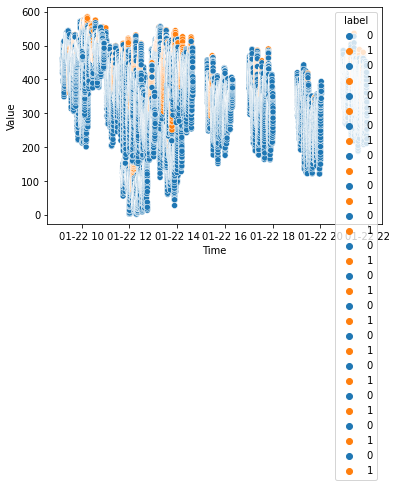

In [5]:
import pandas as pd
import seaborn as sns
for i in range(15):

    df=pd.read_csv("SNew"+str(i+1)+".csv")
    df.label.replace(('YES', 'NO'), (1, 0), inplace=True)
    df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
    sns.scatterplot(data=df, x='Time', y='Value', hue='label')
    #print ("\n")

#### put csv to data frames

In [6]:
import pandas as pd

dataframes_list = []

for i in range(15):

    df=pd.read_csv("SNew"+str(i+1)+".csv")
    dataframes_list.append(df)


#### display 13th dataframe with features

In [7]:
dataframes_list[13]

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,2022-01-22 09:55:37,559.0,NO,5.0,556.500000,556.5,3.535534,559.0,554.0
1,2022-01-22 09:55:38,567.0,NO,8.0,560.000000,559.0,6.557439,567.0,554.0
2,2022-01-22 09:55:39,566.0,NO,-1.0,561.500000,562.5,6.137318,567.0,554.0
3,2022-01-22 09:55:40,558.0,NO,-8.0,560.800000,559.0,5.540758,567.0,554.0
4,2022-01-22 09:55:41,555.0,NO,-3.0,559.833333,558.5,5.492419,567.0,554.0
...,...,...,...,...,...,...,...,...,...
3621,2022-01-22 10:56:05,505.0,NO,0.0,486.000000,490.0,14.443343,508.0,449.0
3622,2022-01-22 10:56:06,504.0,NO,-1.0,486.916667,490.0,13.785637,508.0,455.0
3623,2022-01-22 10:56:07,506.0,NO,2.0,487.750000,490.5,13.390643,508.0,455.0
3624,2022-01-22 10:56:08,506.0,NO,0.0,488.416667,491.0,13.284746,508.0,455.0


#### put all dfs to one

In [8]:
df1=pd.concat(dataframes_list)

#### convert object to datetime

In [9]:

df1['Time'] = pd.to_datetime(df1['Time'], infer_datetime_format = True)


In [10]:
df1.dtypes


Time          datetime64[ns]
Value                float64
label                 object
dropValue            float64
rollmean             float64
rollmedian           float64
rollstd              float64
rollMax              float64
rollMin              float64
dtype: object

In [11]:
df1['Time']=df1['Time'].dt.time 



In [12]:
df1

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
3606,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
3607,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
3608,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
3609,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


#### reset indexes of dataframe

In [13]:
df2=df1

In [14]:
df2.index = range(len(df2))


In [15]:
df2

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0
...,...,...,...,...,...,...,...,...,...
55162,13:04:31,302.0,NO,-2.0,261.916667,262.5,23.038135,304.0,217.0
55163,13:04:32,297.0,NO,-5.0,262.683333,263.5,23.430743,304.0,217.0
55164,13:04:33,295.0,NO,-2.0,263.366667,265.5,23.768635,304.0,217.0
55165,13:04:34,297.0,NO,2.0,264.416667,267.5,23.840780,304.0,217.0


#### df2 datatypes

In [16]:
df2.dtypes


Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

#### df2 size

In [17]:
df2.shape

(55167, 9)

### Class Imbalance

In [18]:
df2.head()

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,13:02:55,351.0,NO,2.0,350.000000,350.0,1.414214,351.0,349.0
1,13:02:56,351.0,NO,0.0,350.333333,351.0,1.154701,351.0,349.0
2,13:02:57,352.0,NO,1.0,350.750000,351.0,1.258306,352.0,349.0
3,13:02:58,329.0,NO,-23.0,346.400000,351.0,9.787747,352.0,329.0
4,13:02:59,328.0,NO,-1.0,343.333333,350.0,11.535453,352.0,328.0


In [19]:
#X = dataset.iloc[:, [3, 8]].values
#X = df2.iloc[:, [3,8]].values
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values
#X = X.reshape(-1, 1)

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

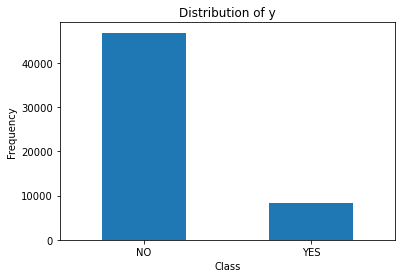

In [21]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Distribution of y")

plt.xlabel("Class")

plt.ylabel("Frequency")

In [22]:
# class count
class_count_0, class_count_1 = df2['label'].value_counts()

# Separate class
class_0 = df2[df2['label'] == 'NO']
class_1 = df2[df2['label'] == "YES"]# print the shape of the class
print('NO:', class_0.shape[0]/(class_1.shape[0]+class_0.shape[0])*100,"%")
print('YES:', class_1.shape[0]/(class_1.shape[0]+class_0.shape[0])*100, "%")

NO: 84.79163267895662 %
YES: 15.208367321043378 %


## Normalization

In [23]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X)

# transform training data
X_norm = norm.transform(X)

# SVM classifier - rbf kernel


#### import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### define x and y

In [ ]:
#X = dataset.iloc[:, [3, 8]].values
#X = df2.iloc[:, [3,8]].values
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values
#X = X.reshape(-1, 1)

In [ ]:
X.shape

(55167, 6)

In [ ]:
y.shape

(55167,)

In [ ]:
print(X)

[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### devide data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  5.         306.93333333 299.          64.61197524 397.
  192.        ]
 [ -8.         486.88333333 475.          31.05822398 544.
  438.        ]
 [ -4.         308.61666667 285.5         71.09890263 427.
  201.        ]
 ...
 [ -1.         230.46666667 234.          25.99639262 280.
  171.        ]
 [  5.         255.45       259.          41.62154958 320.
  155.        ]
 [  0.         269.26666667 274.5         14.74399236 291.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         424.03333333 432.5         48.47084277 508.
  334.        ]
 [  0.         276.03333333 282.          36.04891529 328.
  179.        ]
 [  1.         368.31666667 363.          38.95303198 451.
  307.        ]
 ...
 [ -1.         483.75       484.           1.5        485.
  482.        ]
 [  0.         364.08333333 366.          20.78240102 397.
  317.        ]
 [ -1.         309.21666667 310.          23.23796694 347.
  261.        ]]


#### train the model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

#### predict test data

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### confussion matrix and accuracy


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[11630   116]
 [ 1955    91]]


0.8498404872389791

# SVM classifier - linear kernel

#### import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### define x and y

In [ ]:
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values

In [ ]:
X.shape

(55167, 6)

In [ ]:
y.shape

(55167,)

In [ ]:
print(X)

[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### devide data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  5.         306.93333333 299.          64.61197524 397.
  192.        ]
 [ -8.         486.88333333 475.          31.05822398 544.
  438.        ]
 [ -4.         308.61666667 285.5         71.09890263 427.
  201.        ]
 ...
 [ -1.         230.46666667 234.          25.99639262 280.
  171.        ]
 [  5.         255.45       259.          41.62154958 320.
  155.        ]
 [  0.         269.26666667 274.5         14.74399236 291.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         424.03333333 432.5         48.47084277 508.
  334.        ]
 [  0.         276.03333333 282.          36.04891529 328.
  179.        ]
 [  1.         368.31666667 363.          38.95303198 451.
  307.        ]
 ...
 [ -1.         483.75       484.           1.5        485.
  482.        ]
 [  0.         364.08333333 366.          20.78240102 397.
  317.        ]
 [ -1.         309.21666667 310.          23.23796694 347.
  261.        ]]


#### train the model


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### predict test data

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### confussion matrix and accuracy


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[11736    10]
 [ 2021    25]]


0.8527407192575406

## Randomforest clasifier

#### import libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### define x and y

In [25]:
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values

In [26]:
X.shape

(55167, 6)

In [27]:
y.shape

(55167,)

In [28]:
print(X)

[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [29]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


Normalization

In [30]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X)

# transform training data
X_norm = norm.transform(X)

#### devide data into train and test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.25, random_state = 0)

In [32]:
print(X_train)

[[0.55963303 0.51435984 0.5        0.5213505  0.6575592  0.33628319]
 [0.5        0.84008085 0.81768953 0.25060711 0.92531876 0.77168142]
 [0.51834862 0.51740678 0.47563177 0.57369316 0.71220401 0.35221239]
 ...
 [0.53211009 0.37595028 0.38267148 0.20976347 0.44444444 0.29911504]
 [0.55963303 0.42117171 0.42779783 0.33584201 0.51730419 0.27079646]
 [0.53669725 0.44618077 0.45577617 0.11896847 0.46448087 0.41415929]]


In [33]:
print(X_test)

[[0.5412844  0.72631833 0.74097473 0.39110858 0.85974499 0.58761062]
 [0.53669725 0.45842886 0.46931408 0.29087673 0.53187614 0.31327434]
 [0.5412844  0.6254676  0.61552347 0.31430989 0.75591985 0.53982301]
 ...
 [0.53211009 0.83440932 0.83393502 0.01210342 0.81785064 0.84955752]
 [0.53669725 0.617805   0.62093863 0.16769206 0.6575592  0.55752212]
 [0.53211009 0.51849282 0.5198556  0.18750588 0.56648452 0.45840708]]


###SMOTE


In [34]:
from typing import Counter
# import library
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('After',counter)
##print('Original dataset shape', Counter(y))
##print('Resample dataset shape', Counter(y_ros))

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'NO': 35031, 'YES': 35031})


https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/


###SMOTE ENN

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [35]:
from typing import Counter
# import library
from imblearn.combine import SMOTEENN
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()

# fit predictor and target variable
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)
counter = Counter(y_train_smenn)
print('After',counter)
##print('Original dataset shape', Counter(y))
##print('Resample dataset shape', Counter(y_ros))

Before Counter({'NO': 35031, 'YES': 6344})
After Counter({'YES': 34339, 'NO': 31511})


#### train the model


In [35]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
clf=RandomForestClassifier  (n_estimators=100)


In [37]:
clf.fit(X_train,y_train)


RandomForestClassifier()

#### predict test data

In [38]:
y_pred=clf.predict(X_test)


In [39]:
print(y_pred)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### acuuracy

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11629   117]
 [  329  1717]]
Accuracy: 0.9676624129930395


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11629   117]
 [  329  1717]]
Accuracy Score 0.9676624129930395
Classification report:               precision    recall  f1-score   support

          NO       0.97      0.99      0.98     11746
         YES       0.94      0.84      0.89      2046

    accuracy                           0.97     13792
   macro avg       0.95      0.91      0.93     13792
weighted avg       0.97      0.97      0.97     13792



## Hyper Parameter Optimization

### Randomized Search Cv

In [42]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
##max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
##min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               ##'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               ##'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [43]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_smenn,y_train_smenn)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [44]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'max_depth': 780,
 'criterion': 'gini'}

In [45]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [46]:

best_random_grid=rf_randomcv.best_estimator_

In [47]:
best_random_grid

RandomForestClassifier(max_depth=780, n_estimators=1000)

In [48]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11118   628]
 [  154  1892]]
Accuracy Score 0.943300464037123
Classification report:               precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.92      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.94      0.90     13792
weighted avg       0.95      0.94      0.95     13792



In [49]:

rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'max_depth': 780,
 'criterion': 'gini'}

####Max_depth [10,340,10]

Randomized Search Cv

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
##max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 340,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
##min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               ##'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               ##'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 46, 83, 120, 156, 193, 230, 266, 303, 340], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [52]:
rf=RandomForestClassifier()
rf_randomcv1=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,scoring='f1_macro',
                               random_state=0,n_jobs=-1)
### fit the randomized model
rf_model1=rf_randomcv1.fit(X_train_smenn,y_train_smenn)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [53]:
rf_randomcv1.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_depth': 230,
 'criterion': 'gini'}

In [54]:
rf_randomcv1

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 46, 83, 120, 156, 193,
                                                      230, 266, 303, 340],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [55]:
best_random_grid1=rf_randomcv1.best_estimator_

In [56]:
best_random_grid1

RandomForestClassifier(max_depth=230, n_estimators=600)

In [57]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11119   627]
 [  153  1893]]
Accuracy Score 0.943445475638051
Classification report:               precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.93      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.94      0.90     13792
weighted avg       0.95      0.94      0.95     13792



SMOTE ENN result

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
y_pred=best_random_grid1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11118   628]
 [  154  1892]]
Accuracy Score 0.943300464037123
Classification report:               precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.92      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.94      0.90     13792
weighted avg       0.95      0.94      0.95     13792



In [58]:
rf_model1.feature_importances_

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

In [59]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


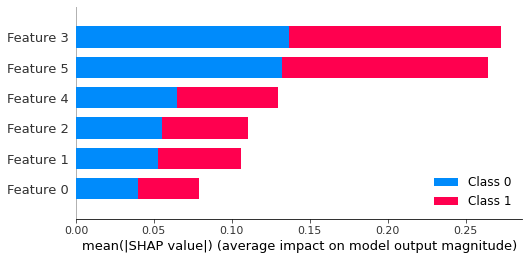

In [60]:
import shap
explainer = shap.TreeExplainer(best_random_grid1)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

####max_depth = [2, 4, 10, 20, 50]

In [61]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
##max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [2, 4, 10, 20, 50]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
##min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               ##'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               ##'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [2, 4, 10, 20, 50], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [62]:
rf=RandomForestClassifier()
rf_randomcv2=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,scoring='f1_macro',
                               random_state=0,n_jobs=-1)
### fit the randomized model
rf_randomcv2.fit(X_train_smenn,y_train_smenn)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 10, 20, 50],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [63]:
rf_randomcv2.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_depth': 50,
 'criterion': 'gini'}

In [64]:
rf_randomcv2

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 10, 20, 50],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [65]:
best_random_grid2=rf_randomcv2.best_estimator_

In [66]:
best_random_grid2

RandomForestClassifier(max_depth=50, n_estimators=800)

In [67]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11121   625]
 [  152  1894]]
Accuracy Score 0.9436629930394431
Classification report:               precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.93      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.94      0.90     13792
weighted avg       0.95      0.94      0.95     13792



https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

## Train with optimized model

####max_depth = [2, 4, 10, 20, 50]

In [36]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
##max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [2, 4, 10, 20, 50]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
##min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               ##'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               ##'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [2, 4, 10, 20, 50], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf_randomcv2=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,scoring='f1_macro',
                               random_state=0,n_jobs=-1)
### fit the randomized model
rf_randomcv2.fit(X_train_smenn,y_train_smenn)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 10, 20, 50],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [39]:
rf_randomcv2.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_depth': 50,
 'criterion': 'gini'}

In [40]:
rf_randomcv2

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 10, 20, 50],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, scoring='f1_macro', verbose=2)

In [41]:
best_random_grid2=rf_randomcv2.best_estimator_

In [42]:
best_random_grid2

RandomForestClassifier(max_depth=50, n_estimators=800)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

from sklearn.metrics import accuracy_score
y_pred=best_random_grid2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11107   639]
 [  158  1888]]
Accuracy Score 0.9422128770301624
Classification report:               precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.92      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.93      0.90     13792
weighted avg       0.95      0.94      0.94     13792



In [46]:
import pickle
pickle.dump(rf_randomcv2, open('modelsvrandomforest.pkl', 'wb'))


In [47]:
import pandas as pd

from dateutil.parser import parse

In [48]:
    newlevel = ','
    stocklevel = ' --> '
    s = open("gsrvideodatatest1.csv").read()
    s = s.replace (stocklevel ,newlevel) #be careful - will currently replace any number in the file matching stock level!
    f = open("gsrvideodatatest1.csv", 'w')
    f.write(s)
    f.close()
    col_Names=["Time", "Value","","label"]
    df = pd.read_csv("gsrvideodatatest1.csv",names=col_Names)
    q=df['Time'].min()
    df = df.drop(df.index[df['Time'] == q])
    df.to_csv("gsrvideodatatest1.csv", index = False,header=False)

In [49]:
for i in range(1):
    #define column names
    col_Names=["Time", "Value","","label"]
    dataframe = pd.read_csv("gsrvideodatatest"+str(i+1)+".csv",parse_dates=['Time'],names=col_Names)

    dataframe.dtypes

    dataframe['Time'] = pd.to_datetime(dataframe['Time'], infer_datetime_format = True)


    dataframe.dtypes

    #set time as index
    indexed_dataset = dataframe.set_index(['Time'])

    indexed_dataset.index.inferred_type == "datetime64"

    indexed_dataset.dtypes

    indexed_dataset.head()

    #remove non value row
    indexed_dataset = indexed_dataset.iloc[:-1 , :]

    #remove NAN column
    indexed_dataset = indexed_dataset.dropna(axis=1)


    indexed_dataset

    indexed_dataset.dtypes

    indexed_dataset.index.inferred_type == "datetime64"
    
    #define value as float
    indexed_dataset['Value'] = indexed_dataset['Value'].astype(float)


    indexed_dataset.dtypes


    #get dropvalue feature
    indexed_dataset['dropValue'] = indexed_dataset['Value'].diff()
    
    #get rollmean feature
    indexed_dataset['rollmean'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).mean()
    
    #get rollmedian feature
    indexed_dataset['rollmedian'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).median()
    
    #get rollstd feature
    indexed_dataset['rollstd'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).std()
    
    #get rollmax feature
    indexed_dataset['rollMax'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).max()
    
    #get rollmin feature
    indexed_dataset['rollMin'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).min()

    indexed_dataset
    
    #remove non value rows
    indexed_dataset = indexed_dataset.iloc[1: , :]


    indexed_dataset

    #write to csv files
    indexed_dataset.to_csv("SNewtest"+str(i+1)+".csv", index = True)

In [50]:
import pandas as pd

dataframes_list = []

for i in range(1):

    df=pd.read_csv("SNewtest"+str(i+1)+".csv")
    dataframes_list.append(df)

In [51]:
df1=pd.concat(dataframes_list)

In [52]:
df1['Time'] = pd.to_datetime(df1['Time'], infer_datetime_format = True)


In [53]:
df1['Time']=df1['Time'].dt.time 
df2=df1

In [54]:
df2.index = range(len(df2))

In [55]:
df2

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,09:46:39,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,09:46:40,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
2,09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
3,09:46:42,531.0,NO,1.0,530.200000,530.0,0.447214,531.0,530.0
4,09:46:43,533.0,NO,2.0,530.666667,530.0,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3721,10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3722,10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3723,10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3724,10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [56]:
df2.shape

(3726, 9)

In [57]:
df2.dtypes

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [58]:
time1 = df2.loc[0,'Time']
print(time1)

09:46:39


In [59]:
df3=df2

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        3726 non-null   object 
 1   Value       3726 non-null   float64
 2   label       3726 non-null   object 
 3   dropValue   3726 non-null   float64
 4   rollmean    3726 non-null   float64
 5   rollmedian  3726 non-null   float64
 6   rollstd     3726 non-null   float64
 7   rollMax     3726 non-null   float64
 8   rollMin     3726 non-null   float64
dtypes: float64(7), object(2)
memory usage: 262.1+ KB


In [61]:
df3['Time'] = pd.to_datetime(df3['Time'], format='%H:%M:%S')

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        3726 non-null   datetime64[ns]
 1   Value       3726 non-null   float64       
 2   label       3726 non-null   object        
 3   dropValue   3726 non-null   float64       
 4   rollmean    3726 non-null   float64       
 5   rollmedian  3726 non-null   float64       
 6   rollstd     3726 non-null   float64       
 7   rollMax     3726 non-null   float64       
 8   rollMin     3726 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 262.1+ KB


In [63]:
df3

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,1900-01-01 09:46:39,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,1900-01-01 09:46:40,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
2,1900-01-01 09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
3,1900-01-01 09:46:42,531.0,NO,1.0,530.200000,530.0,0.447214,531.0,530.0
4,1900-01-01 09:46:43,533.0,NO,2.0,530.666667,530.0,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3721,1900-01-01 10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3722,1900-01-01 10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3723,1900-01-01 10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3724,1900-01-01 10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [64]:
from datetime import timedelta

In [65]:
df3.index

RangeIndex(start=0, stop=3726, step=1)

In [72]:
time1 = df3.loc[0,'Time']
pickled_model = pickle.load(open('modelsvrandomforest.pkl', 'rb'))
X_testactualall = df3.iloc[:, 3:9].values

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
normg = MinMaxScaler().fit(X_testactualall)
# transform training data
X_normg = normg.transform(X_testactualall)

arrall=pickled_model.predict(X_normg)
print(arrall)  
    


['YES' 'YES' 'YES' ... 'NO' 'NO' 'NO']


In [73]:
time1 = df3.loc[0,'Time']
pickled_model = pickle.load(open('modelsvrandomforest.pkl', 'rb'))
#X_testactualall = df3.iloc[:, 3:9].values
#arrall=pickled_model.predict(X_testactualall)
#print(arrall)

rows=0
while ((rows+120)<len(df3.index)):
  type(time1)
  end_time = time1 + timedelta(minutes = 2)
  end_time
  iArray=df3.index[df3['Time']==end_time].tolist()
  rows=iArray[0]
  df4=df3.loc[(df3['Time'] >= time1) & (df3['Time'] <= end_time)]
  df4
  X_testactual = df4.iloc[:, 3:9].values
  X_testactual
  # data normalization with sklearn
  from sklearn.preprocessing import MinMaxScaler
  # fit scaler on training data
  norm = MinMaxScaler().fit(X_testactual)
  # transform training data
  X_norm = norm.transform(X_testactual)
  arr=pickled_model.predict(X_norm)
  arr
  cot=0
  for tag in arr:
      if(tag=='YES'):
          cot=cot+1
  percentage=cot/len(arr)*100
  print(str(percentage)+"%")
  time1=end_time

9.090909090909092%
6.6115702479338845%
9.166666666666666%
32.231404958677686%
3.3057851239669422%
8.264462809917356%
0.8333333333333334%
5.833333333333333%
8.264462809917356%
1.6528925619834711%
0.0%
9.090909090909092%
9.166666666666666%
3.3057851239669422%
4.132231404958678%
10.743801652892563%
10.743801652892563%
4.166666666666666%
9.090909090909092%
14.049586776859504%
6.6115702479338845%
0.0%
0.8264462809917356%
4.132231404958678%
3.3057851239669422%
28.92561983471074%
0.0%
0.8264462809917356%
8.264462809917356%
0.0%
0.0%


In [74]:
yactual = df3.iloc[:, 2].values

In [75]:
print(yactual)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [76]:
print(arrall)

['YES' 'YES' 'YES' ... 'NO' 'NO' 'NO']


Text(0, 0.5, 'Frequency')

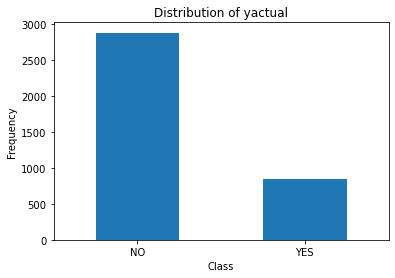

In [77]:
count_classes = pd.value_counts(yactual, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Distribution of yactual")

plt.xlabel("Class")

plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

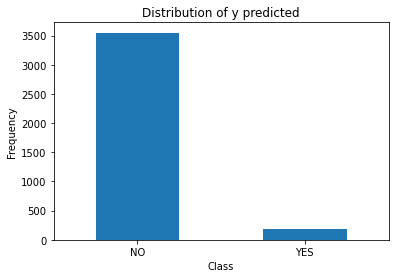

In [79]:
count_classes = pd.value_counts(arrall, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Distribution of y predicted")

plt.xlabel("Class")

plt.ylabel("Frequency")

### Grid Search

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth'],
                  rf_randomcv.best_params_['max_depth']+10,
                  rf_randomcv.best_params_['max_depth']-10],
    #'max_features': [rf_randomcv.best_params_['max_features']],
    #'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
    #                     rf_randomcv.best_params_['min_samples_leaf']+2, 
    #                     rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [780, 790, 770], 'min_samples_split': [2, 3, 4], 'n_estimators': [900, 1000, 1100, 1100]}


In [69]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=4,n_jobs=-1,verbose=1)
grid_search.fit(X_train_smenn,y_train_smenn)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [780, 790, 770],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [900, 1000, 1100, 1100]},
             verbose=1)

In [70]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=780, n_estimators=900)

In [71]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=780, n_estimators=900)

In [72]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[11113   633]
 [  153  1893]]
Accuracy Score 0.9430104408352669
Classification report:               precision    recall  f1-score   support

          NO       0.99      0.95      0.97     11746
         YES       0.75      0.93      0.83      2046

    accuracy                           0.94     13792
   macro avg       0.87      0.94      0.90     13792
weighted avg       0.95      0.94      0.95     13792



## Logistic Regression

#### import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### define x and y


In [ ]:
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values

In [ ]:
X.shape

(55167, 6)

In [ ]:
y.shape

(55167,)

In [ ]:
print(X)

[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### devide data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  5.         306.93333333 299.          64.61197524 397.
  192.        ]
 [ -8.         486.88333333 475.          31.05822398 544.
  438.        ]
 [ -4.         308.61666667 285.5         71.09890263 427.
  201.        ]
 ...
 [ -1.         230.46666667 234.          25.99639262 280.
  171.        ]
 [  5.         255.45       259.          41.62154958 320.
  155.        ]
 [  0.         269.26666667 274.5         14.74399236 291.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         424.03333333 432.5         48.47084277 508.
  334.        ]
 [  0.         276.03333333 282.          36.04891529 328.
  179.        ]
 [  1.         368.31666667 363.          38.95303198 451.
  307.        ]
 ...
 [ -1.         483.75       484.           1.5        485.
  482.        ]
 [  0.         364.08333333 366.          20.78240102 397.
  317.        ]
 [ -1.         309.21666667 310.          23.23796694 347.
  261.        ]]


#### train the model


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modellr = LogisticRegression(max_iter=3000000)


In [ ]:
modellr.fit(X_train,y_train)


LogisticRegression(max_iter=3000000)

#### predict test data

In [ ]:
y_pred=modellr.predict(X_test)
print(y_pred)

['NO' 'NO' 'NO' ... 'YES' 'NO' 'NO']


#### accuracy

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11456   290]
 [ 1536   510]]
Accuracy: 0.8676044083526682


## LightGBM classifier

#### import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### define x and y


In [ ]:
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values

In [ ]:
X.shape

(55167, 6)

In [ ]:
y.shape

(55167,)

In [ ]:
print(X)

[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### devide data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  5.         306.93333333 299.          64.61197524 397.
  192.        ]
 [ -8.         486.88333333 475.          31.05822398 544.
  438.        ]
 [ -4.         308.61666667 285.5         71.09890263 427.
  201.        ]
 ...
 [ -1.         230.46666667 234.          25.99639262 280.
  171.        ]
 [  5.         255.45       259.          41.62154958 320.
  155.        ]
 [  0.         269.26666667 274.5         14.74399236 291.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         424.03333333 432.5         48.47084277 508.
  334.        ]
 [  0.         276.03333333 282.          36.04891529 328.
  179.        ]
 [  1.         368.31666667 363.          38.95303198 451.
  307.        ]
 ...
 [ -1.         483.75       484.           1.5        485.
  482.        ]
 [  0.         364.08333333 366.          20.78240102 397.
  317.        ]
 [ -1.         309.21666667 310.          23.23796694 347.
  261.        ]]


#### train the model


In [ ]:
!pip install lightgbm
from lightgbm import LGBMClassifier

In [ ]:
modellgbm = LGBMClassifier()
modellgbm.fit(X_train,y_train)

LGBMClassifier()

#### predict test data

In [ ]:
y_pred=modellgbm.predict(X_test)
print(y_pred)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### accuracy

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11477   269]
 [  731  1315]]
Accuracy: 0.9274941995359629


# xgboost classifier

#### import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### define x and y


In [ ]:
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values

In [ ]:
X.shape

(55167, 6)

In [ ]:
y.shape

(55167,)

In [ ]:
print(X)

[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### devide data into train and test


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  5.         306.93333333 299.          64.61197524 397.
  192.        ]
 [ -8.         486.88333333 475.          31.05822398 544.
  438.        ]
 [ -4.         308.61666667 285.5         71.09890263 427.
  201.        ]
 ...
 [ -1.         230.46666667 234.          25.99639262 280.
  171.        ]
 [  5.         255.45       259.          41.62154958 320.
  155.        ]
 [  0.         269.26666667 274.5         14.74399236 291.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         424.03333333 432.5         48.47084277 508.
  334.        ]
 [  0.         276.03333333 282.          36.04891529 328.
  179.        ]
 [  1.         368.31666667 363.          38.95303198 451.
  307.        ]
 ...
 [ -1.         483.75       484.           1.5        485.
  482.        ]
 [  0.         364.08333333 366.          20.78240102 397.
  317.        ]
 [ -1.         309.21666667 310.          23.23796694 347.
  261.        ]]


#### train the model


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
modelxgb = XGBClassifier()
modelxgb.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### predict test data

In [ ]:
y_pred=modelxgb.predict(X_test)
print(y_pred)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### accuracy

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11516   230]
 [  495  1551]]
Accuracy: 0.9474332946635731


# #SVM classifier

#### import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### define x and y

In [ ]:
#X = dataset.iloc[:, [3, 8]].values
#X = df2.iloc[:, [3,8]].values
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values
#X = X.reshape(-1, 1)

In [ ]:
X.shape

(55167, 6)

In [ ]:
y.shape

(55167,)

In [ ]:
print(X)

[[  2.         350.         350.           1.41421356 351.
  349.        ]
 [  0.         350.33333333 351.           1.15470054 351.
  349.        ]
 [  1.         350.75       351.           1.25830574 352.
  349.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### devide data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  5.         306.93333333 299.          64.61197524 397.
  192.        ]
 [ -8.         486.88333333 475.          31.05822398 544.
  438.        ]
 [ -4.         308.61666667 285.5         71.09890263 427.
  201.        ]
 ...
 [ -1.         230.46666667 234.          25.99639262 280.
  171.        ]
 [  5.         255.45       259.          41.62154958 320.
  155.        ]
 [  0.         269.26666667 274.5         14.74399236 291.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         470.08333333 473.5         18.50816738 497.
  429.        ]
 [  1.         458.38333333 460.          13.58849422 476.
  429.        ]
 [  1.         466.38333333 467.          11.92361518 488.
  444.        ]
 ...
 [-14.         433.05       447.          48.9238166  495.
  315.        ]
 [ -7.         507.31666667 507.          11.69744528 527.
  486.        ]
 [ -1.         550.35       552.           7.70829401 559.
  536.        ]]


#### train the model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
perm_importance = permutation_importance(classifier, X_test, y_test)


In [ ]:
features_names = ['dropValue','rollmean', 'rollmedian','rollstd','rollMax','rollMin'] 


Text(0.5, 0, 'Permutation Importance')

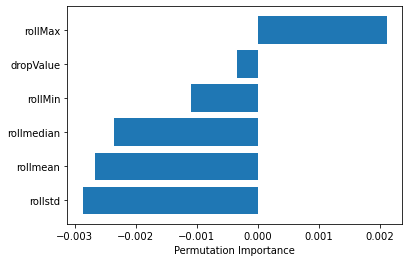

In [ ]:
features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

#### predict test data

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


#### confussion matrix and accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[11630   116]
 [ 1955    91]]


0.8498404872389791

Save SVM to Pickle


In [ ]:
#save svm to pickle

In [ ]:
import pickle


In [ ]:
pickle.dump(classifier, open('modelsvm.pkl', 'wb'))


In [ ]:
#preprocess test data

Preprocess test data

In [ ]:
import pandas as pd

from dateutil.parser import parse


In [ ]:

    newlevel = ','
    stocklevel = ' --> '
    s = open("gsrvideodatatest1.csv").read()
    s = s.replace (stocklevel ,newlevel) #be careful - will currently replace any number in the file matching stock level!
    f = open("gsrvideodatatest1.csv", 'w')
    f.write(s)
    f.close()
    col_Names=["Time", "Value","","label"]
    df = pd.read_csv("gsrvideodatatest1.csv",names=col_Names)
    q=df['Time'].min()
    df = df.drop(df.index[df['Time'] == q])
    df.to_csv("gsrvideodatatest1.csv", index = False,header=False)

In [ ]:
for i in range(1):
    #define column names
    col_Names=["Time", "Value","","label"]
    dataframe = pd.read_csv("gsrvideodatatest"+str(i+1)+".csv",parse_dates=['Time'],names=col_Names)

    dataframe.dtypes

    dataframe['Time'] = pd.to_datetime(dataframe['Time'], infer_datetime_format = True)


    dataframe.dtypes

    #set time as index
    indexed_dataset = dataframe.set_index(['Time'])

    indexed_dataset.index.inferred_type == "datetime64"

    indexed_dataset.dtypes

    indexed_dataset.head()

    #remove non value row
    indexed_dataset = indexed_dataset.iloc[:-1 , :]

    #remove NAN column
    indexed_dataset = indexed_dataset.dropna(axis=1)


    indexed_dataset

    indexed_dataset.dtypes

    indexed_dataset.index.inferred_type == "datetime64"
    
    #define value as float
    indexed_dataset['Value'] = indexed_dataset['Value'].astype(float)


    indexed_dataset.dtypes


    #get dropvalue feature
    indexed_dataset['dropValue'] = indexed_dataset['Value'].diff()
    
    #get rollmean feature
    indexed_dataset['rollmean'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).mean()
    
    #get rollmedian feature
    indexed_dataset['rollmedian'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).median()
    
    #get rollstd feature
    indexed_dataset['rollstd'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).std()
    
    #get rollmax feature
    indexed_dataset['rollMax'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).max()
    
    #get rollmin feature
    indexed_dataset['rollMin'] = indexed_dataset['Value'].rolling(window = 60,min_periods=1).min()

    indexed_dataset
    
    #remove non value rows
    indexed_dataset = indexed_dataset.iloc[1: , :]


    indexed_dataset

    #write to csv files
    indexed_dataset.to_csv("SNewtest"+str(i+1)+".csv", index = True)


In [ ]:
import pandas as pd

dataframes_list = []

for i in range(1):

    df=pd.read_csv("SNewtest"+str(i+1)+".csv")
    dataframes_list.append(df)

In [ ]:
df1=pd.concat(dataframes_list)

In [ ]:
df1['Time'] = pd.to_datetime(df1['Time'], infer_datetime_format = True)


In [ ]:
df1['Time']=df1['Time'].dt.time 
df2=df1

In [ ]:
df2.index = range(len(df2))


In [ ]:
df2

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,09:46:42,531.0,NO,1.0,530.333333,530.0,0.577350,531.0,530.0
2,09:46:43,533.0,NO,2.0,531.000000,530.5,1.414214,533.0,530.0
3,09:46:44,532.0,NO,-1.0,531.200000,531.0,1.303840,533.0,530.0
4,09:46:45,532.0,NO,0.0,531.333333,531.5,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3720,10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3721,10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3722,10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3723,10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [ ]:
df2.shape

(3725, 9)

In [ ]:
df2.dtypes

Time           object
Value         float64
label          object
dropValue     float64
rollmean      float64
rollmedian    float64
rollstd       float64
rollMax       float64
rollMin       float64
dtype: object

In [ ]:
time1 = df2.loc[0,'Time']
print(time1)

09:46:41


In [ ]:
df3=df2

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        3725 non-null   object 
 1   Value       3725 non-null   float64
 2   label       3725 non-null   object 
 3   dropValue   3725 non-null   float64
 4   rollmean    3725 non-null   float64
 5   rollmedian  3725 non-null   float64
 6   rollstd     3725 non-null   float64
 7   rollMax     3725 non-null   float64
 8   rollMin     3725 non-null   float64
dtypes: float64(7), object(2)
memory usage: 262.0+ KB


In [ ]:
df3['Time'] = pd.to_datetime(df3['Time'], format='%H:%M:%S')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        3725 non-null   datetime64[ns]
 1   Value       3725 non-null   float64       
 2   label       3725 non-null   object        
 3   dropValue   3725 non-null   float64       
 4   rollmean    3725 non-null   float64       
 5   rollmedian  3725 non-null   float64       
 6   rollstd     3725 non-null   float64       
 7   rollMax     3725 non-null   float64       
 8   rollMin     3725 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 262.0+ KB


In [ ]:
df3

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
0,1900-01-01 09:46:41,530.0,NO,0.0,530.000000,530.0,0.000000,530.0,530.0
1,1900-01-01 09:46:42,531.0,NO,1.0,530.333333,530.0,0.577350,531.0,530.0
2,1900-01-01 09:46:43,533.0,NO,2.0,531.000000,530.5,1.414214,533.0,530.0
3,1900-01-01 09:46:44,532.0,NO,-1.0,531.200000,531.0,1.303840,533.0,530.0
4,1900-01-01 09:46:45,532.0,NO,0.0,531.333333,531.5,1.211060,533.0,530.0
...,...,...,...,...,...,...,...,...,...
3720,1900-01-01 10:48:47,289.0,NO,15.0,265.716667,256.0,47.506321,374.0,178.0
3721,1900-01-01 10:48:48,298.0,NO,9.0,265.233333,256.0,47.017259,374.0,178.0
3722,1900-01-01 10:48:49,279.0,NO,-19.0,264.383333,256.0,46.281779,374.0,178.0
3723,1900-01-01 10:48:50,287.0,NO,8.0,263.633333,256.0,45.525916,374.0,178.0


In [ ]:
time1 = df3.loc[0,'Time']
type(time1)


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
from datetime import timedelta

In [ ]:
start_time = time1 + timedelta(minutes = 13)
start_time

Timestamp('1900-01-01 09:59:41')

In [ ]:
end_time = time1 + timedelta(minutes = 15)
end_time

Timestamp('1900-01-01 10:01:41')

In [ ]:
df4=df3.loc[(df3['Time'] >= start_time) & (df3['Time'] <= end_time)]

In [ ]:
df4

,Time,Value,label,dropValue,rollmean,rollmedian,rollstd,rollMax,rollMin
779,1900-01-01 09:59:41,387.0,NO,-25.0,353.766667,363.5,56.423750,471.0,238.0
780,1900-01-01 09:59:42,343.0,NO,-44.0,351.633333,360.5,54.295790,470.0,238.0
781,1900-01-01 09:59:43,336.0,NO,-7.0,349.400000,358.0,52.054144,456.0,238.0
782,1900-01-01 09:59:44,338.0,NO,2.0,347.433333,355.5,50.152772,413.0,238.0
783,1900-01-01 09:59:45,341.0,NO,3.0,346.416667,352.5,49.643574,413.0,238.0
...,...,...,...,...,...,...,...,...,...
894,1900-01-01 10:01:37,249.0,NO,13.0,317.333333,313.5,68.753223,467.0,221.0
895,1900-01-01 10:01:38,256.0,NO,7.0,314.416667,309.5,67.550933,467.0,221.0
896,1900-01-01 10:01:39,260.0,NO,4.0,311.550000,305.5,66.110699,467.0,221.0
897,1900-01-01 10:01:40,266.0,NO,6.0,308.766667,302.5,64.404276,467.0,221.0


In [ ]:
pickled_model = pickle.load(open('modelsvm.pkl', 'rb'))


In [ ]:
X_testactual = df4.iloc[:, 3:9].values
X_testactual

array([[-25.        , 353.76666667, 363.5       ,  56.42374986,
        471.        , 238.        ],
       [-44.        , 351.63333333, 360.5       ,  54.2957896 ,
        470.        , 238.        ],
       [ -7.        , 349.4       , 358.        ,  52.05414391,
        456.        , 238.        ],
       [  2.        , 347.43333333, 355.5       ,  50.15277226,
        413.        , 238.        ],
       [  3.        , 346.41666667, 352.5       ,  49.64357424,
        413.        , 238.        ],
       [ -3.        , 346.51666667, 352.5       ,  49.6200792 ,
        413.        , 238.        ],
       [  1.        , 347.65      , 352.5       ,  48.63277301,
        413.        , 238.        ],
       [  1.        , 349.11666667, 352.5       ,  46.99877087,
        413.        , 238.        ],
       [  2.        , 350.61666667, 352.5       ,  45.25037379,
        413.        , 238.        ],
       [  1.        , 352.36666667, 352.5       ,  42.78442876,
        413.        , 248. 

In [ ]:
arr=pickled_model.predict(X_testactual)
arr


array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'],
      dtype=object)

In [ ]:
type(arr)

numpy.ndarray

In [ ]:
cot=0
for tag in arr:
    if(tag=='YES'):
        cot=cot+1
        
percentage=cot/len(arr)*100

In [ ]:
print(str(percentage)+"%")

0.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df2.iloc[:, 3:9].values


y = df2.iloc[:, 2].values

In [ ]:
X.shape

(55152, 6)

In [ ]:
y.shape

(55152,)

In [ ]:
print(X)

[[  0.         351.         351.           0.         351.
  351.        ]
 [  1.         351.33333333 351.           0.57735027 352.
  351.        ]
 [-23.         345.75       351.          11.17661249 352.
  329.        ]
 ...
 [ -2.         263.36666667 265.5         23.76863527 304.
  217.        ]
 [  2.         264.41666667 267.5         23.84077953 304.
  217.        ]
 [-27.         265.3        269.          23.02194973 304.
  219.        ]]


In [ ]:
print(y)

['NO' 'NO' 'NO' ... 'NO' 'NO' 'NO']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[  6.         167.01666667 165.5         32.52195695 216.
   99.        ]
 [  0.         428.38333333 428.          11.3183392  449.
  403.        ]
 [  3.         348.21666667 366.          70.88641946 433.
  203.        ]
 ...
 [ 26.         220.51666667 225.5         35.28263205 280.
  139.        ]
 [ 12.         258.88333333 261.          40.53167486 320.
  152.        ]
 [  1.         269.55       274.5         15.01685494 292.
  236.        ]]


In [ ]:
print(X_test)

[[  1.         470.08333333 473.5         18.50816738 497.
  429.        ]
 [  1.         458.38333333 460.          13.58849422 476.
  429.        ]
 [  1.         466.38333333 467.          11.92361518 488.
  444.        ]
 ...
 [-14.         433.05       447.          48.9238166  495.
  315.        ]
 [ -7.         507.31666667 507.          11.69744528 527.
  486.        ]
 [ -1.         550.35       552.           7.70829401 559.
  536.        ]]


Feature: 0, Score: 0.01843
Feature: 1, Score: -0.07735
Feature: 2, Score: 0.04577
Feature: 3, Score: 0.00611
Feature: 4, Score: -0.01444
Feature: 5, Score: 0.04731


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


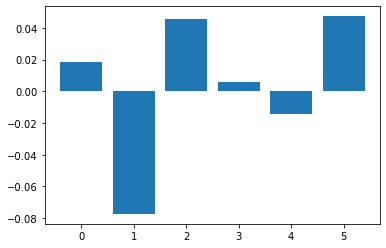

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Cross fold validation

#### define x and y

In [ ]:
data=df2.iloc[:, 3:9].values


In [ ]:
target=df2.iloc[:, 2].values

#### import libraries

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#### LogisticRegression

In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), data, target,cv=3)


array([0.86303307, 0.82457572, 0.86058529])

In [ ]:
# get importance
importance = LogisticRegression.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: type object 'LogisticRegression' has no attribute 'coef_'

#### support vector classifier

In [ ]:
cross_val_score(SVC(gamma='auto'), data, target,cv=3)


KeyboardInterrupt: 

#### RandomForestClassifier

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),data, target,cv=3)


array([0.85068538, 0.8203329 , 0.85226284])

RandomizedSearchCV -SVM

In [ ]:
#class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
C = [0.01, 0.1, 0.5, 1, 5, 10]
kernel=['linear', 'poly', 'rbf', 'sigmoid']
degree = [2,3,5,7]

random_grid = {'C': C,
               'kernel': kernel,
               'degree': degree,
               'gamma': ['scale', 'auto'] }
print(random_grid)

{'C': [0.01, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 5, 7], 'gamma': ['scale', 'auto']}


In [ ]:
from sklearn.svm import SVC
classifier=SVC()
SVM_randomcv=RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
### fit the randomized model
SVM_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
SVM_randomcv.best_params_


In [ ]:
SVM_randomcv

In [ ]:
best_random_grid_SVM=SVM_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_SVM=best_random_grid_SVM.predict(X_test)
print(confusion_matrix(y_test,y_pred_SVM))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_SVM)))
print("Classification report: {}".format(classification_report(y_test,y_pred_SVM)))
